# Face Recognition 

Face recognition is a broad problem of identifying or verifying people in photographs and videos.
Face recognition is a process comprised of detection, alignment, feature extraction, and a recognition task

There are many reasons why we might want to automatically recognize a person in a photograph:
    We may want to restrict access to a resource to one person, called face authentication.
    We may want to confirm that the person matches their ID, called face verification.
    We may want to assign a name to a face, called face identification.

# Face Detection

Face detection is a problem in computer vision of locating and localizing one or more faces in a photograph.
Face detection can be performed using the classical feature-based cascade classifier using the OpenCV library.
State-of-the-art face detection can be achieved using a Multi-task Cascade CNN via the MTCNN library.

# Face Detection With OpenCV

In [8]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

In [9]:
# plot photo with detected faces using opencv cascade classifier
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('test2.jpg')
# load the pre-trained model
classifier = CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
#bboxes = classifier.detectMultiScale(pixels, 1.1, 3)
#bboxes = classifier.detectMultiScale(pixels, 1.05, 8)
# print bounding box for each detected face
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

We can see that a face on the first or bottom row of people was detected twice.
The scaleFactor controls how the input image is scaled prior to detection, e.g. is it scaled up or down, which can help to better find the faces in the image. The default value is 1.1 (10% increase), although this can be lowered to values such as 1.05 (5% increase) or raised to values such as 1.4 (40% increase).

# Face Detection With Deep Learning

For Face Detection in Deep Learning one of the most popular approaches is called the “Multi-Task Cascaded Convolutional Neural Network,” or MTCNN for short, described by Kaipeng Zhang, et al. in the 2016 paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.

![title](Image.png)

### Intall Library:

pip install mtcnn

In [10]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [449, 107, 201, 271], 'confidence': 0.9981017708778381, 'keypoints': {'left_eye': (505, 206), 'right_eye': (599, 205), 'nose': (555, 272), 'mouth_left': (510, 317), 'mouth_right': (597, 313)}}


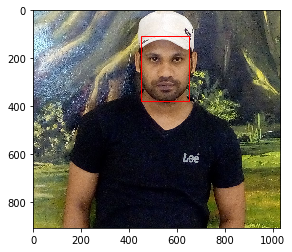

In [11]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

### We can draw a circle via the Circle class for the eyes, nose, and mouth

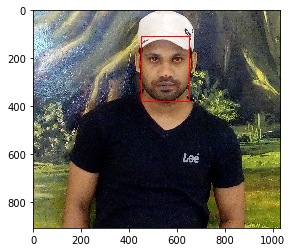

In [13]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

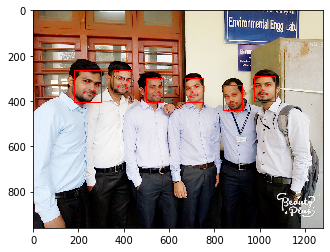

In [14]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()

filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

### Draw Each Face Separately

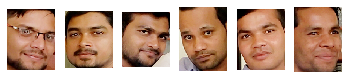

In [15]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()

filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)
    